# Assignment 3 - MACS 300
## Name: Keertana V. Chidambaram (12211266)

## 1. Simulation in Sociology (Moretti - 2002)

The paper, ‘Computer Simulation in Sociology’ (Sabrina Moretti, 2002) discusses the role, relevance, and restrictions of computer simulations in sociology. Broadly, four different types of models have been discussed: System Dynamics, Multiagent Systems, Cellular Automata, and Genetic Algorithms. 


The Multiagent Systems and the Cellular Automata models try to model individuals in a system to understand the emergence of macro patterns. However, the Multiagent Systems models should improve along three different dimensions to be a closer representation of reality: improved theories for rationalization (to include learning and adaptation), formalization of aspects of psychological theories (emotions, motivations, etc.) and formalization of knowledge (e.g. formalizing common sense). 

Similarly, in the case of Cellular Automata, the author identifies two restrictions that prevent it from accurately depicting the real world. First, in the model, all the individual players update information at set frequencies according to a global clock. But real people change attitudes and opinions at very different times. This error can be reduced by ensuring that not all agents gain information at each round of updating. Second, in the model, agents only interact with their neighbors. But in the real world, information transfer can occur between distant locations (with the use of media), and neighborhoods can change over time. 

Apart from the weaknesses stemming out of the model formulation, errors can also occur while cross-checking model outputs with real-world data. One problem is in the comparison of artificial data with real data. Computational models can only give quantitative outputs for a social model. The problem arises when we try to find meaning in these quantitative outputs. The author gives an example from politics to prove this point. For example, let us say that a model describes 'political prestige' as a real number between 0 and 1 and the results shows 0.4. The challenge here is to understand how exactly '0.4' translates to the real world - does it mean more or less political prestige? Another problem stems from measurement error. There are no absolute scales to measure a social variable. Thus, a measurement is always dependent on the intuition of the researchers. If the measurements i.e. the inputs to the model cannot be fully trusted, the model's validity will be questioned. Hence, computational models find less acceptance when applied to model a social phenomenon. 

While discussing the models, the paper also delves into the concept of dynamic feedback. The author gives an example from the paper Doranet. al. (1994). The paper is based on the theory that individuals aim to collaborate with others when they are in a situation of economic variability, and collaboration allows them to survive. They use the model to understand how villages are developed and how hierarchies are formed in the village. Here, simulative experiments are used to understand how feedback between individuals lead to the formation of hierarchies in a social group. The relationship between winning chances and donations in political science is another example of dynamic feedback. The donation to a political campaign depends on the likelihood of the party winning the election. But an increase in donation further leads to an increase in winning chances leading to even more funds. Thus, even small differences in competitive advantage at the start of a campaign can lead to significant variations in winning chances for the elections. 

The paper thus provides not just the motivation to use models in sociology, but also some useful model frameworks and application areas for the models. All in all, the paper is a useful read to understand the evolving field at the intersection of sociology and computational science. 

## 2. Simulating your income

### (a) Simulating the income matrix

In [27]:
# Import initial packages
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.stats as scs
from scipy.signal import savgol_filter

In [28]:
#Define parameters
p = {
    "mean" : 0,
    "stdev" : 0.13,
    "rho" : 0.4,
    "g" : 0.025,
    "I0" : 80000,
    "y1" : 2020,
    "work_life" : 40,
    "sims" : 10000,
}
#Setting random seed to control randomness
np.random.seed(524)

In [29]:
#Funcion creating the income matrix from the given equation
def income_matrix(p):
    log_errors = np.random.normal(p["mean"], p["stdev"], (p["sims"], p["work_life"]))
    income_mat = np.zeros((p["sims"], p["work_life"]))
    for i in range(0, p["sims"]):
        income_mat[i][0] = np.exp(np.log(p["I0"]) + log_errors[i][0])
        for j in range(1, p["work_life"]):
            income_mat[i][j] = np.exp((1 - p["rho"]) * (np.log(p["I0"]) + p["g"] * j) \
                    + (p["rho"] * np.log(income_mat[i][j-1])) + log_errors[i][j])
    return income_mat

E:\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<module 'matplotlib.pyplot' from 'E:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

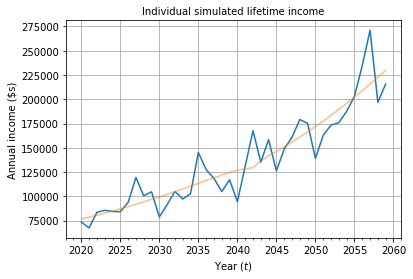

In [30]:
income_mat = income_matrix(p)
#Plotting the income path for simulation row no. 500
SIM_NO = 500

year_vec = np.arange(p["y1"], p["y1"] + p["work_life"])
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[SIM_NO, :])

#Fitting a smooth curve over the jagged graph
yhat = savgol_filter(income_mat[SIM_NO, :], 31, 2) 
# window size 51, polynomial order 3
plt.plot(year_vec, yhat, alpha = 0.5)

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year ($t$)')
plt.ylabel(r'Annual income (\$s)')

plt

### (b) Understanding distribution of starting income

Text(0.5,1,'Number of students in income bins')

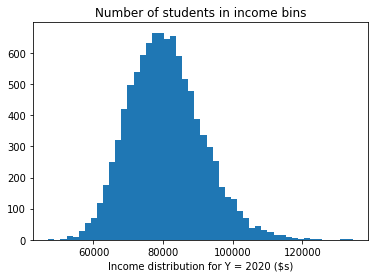

In [31]:
#Histogram for income at Y = 2020 for 10,000 simulations
plt.hist(income_mat[:,0], bins=50)
plt.xlabel('Income distribution for Y = 2020 (\$s)')
plt.title('Number of students in income bins')

In [32]:
#Percentile of students earning more than $100,000
MIN_INCOME = 100000
100 - scs.percentileofscore(income_mat[:,0], MIN_INCOME, kind='rank')

4.510000000000005

In [33]:
#Percentile of students earning less than 70,000
MAX_INCOME = 70000
scs.percentileofscore(income_mat[:,0], MAX_INCOME, kind='rank')

15.19

(i) ~4.51 percentile students earn more than 100,000 dollars and ~15.19 percentile earned less than 70,000 dollars. <br>
(ii) The distribution is more-or-less bell shaped and symmetric, and hence can be approximated to be a normal distribution.

### (c) Loan term simulation

In [34]:
#Calculating the no. of years for loan repayment for each of the 10,000 simulations
DEBT = 95000
PAYMENT_PER = 0.1

final_debt_year = np.zeros((p["sims"], 1))
np.shape(final_debt_year)

for i in range(0, p["sims"]):
    payoff_mat = np.cumsum(income_mat[i,:]) * PAYMENT_PER
    incomplete_pay = payoff_mat < DEBT
    final_debt_year[i,0] = sum(incomplete_pay) + 1

Text(0.5,1,'No. of Students in Year Bins')

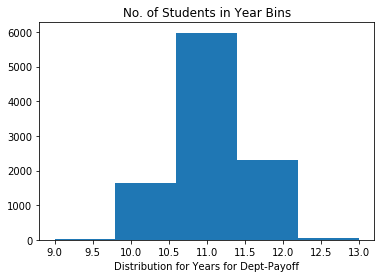

In [35]:
#Histogram for no. of years of payoff for 100,000 simulations
plt.hist(final_debt_year, bins = len(np.unique(final_debt_year)))
plt.xlabel("Distribution for Years for Dept-Payoff")
plt.title("No. of Students in Year Bins")

In [36]:
#Percentage of simulation where debt is paid off on or before 10 years
MAX_PAYOFF_YEAR = 10
sum(((final_debt_year[:,0] <= MAX_PAYOFF_YEAR)* 100 ) / p["sims"])

16.659999999999805

Percentable of simulation where debt is paid off on or before 10 years ~ 16.66%.

### (d) Loan term simulation with modified parameters

Text(0.5,1,'No. of Students in Year Bins')

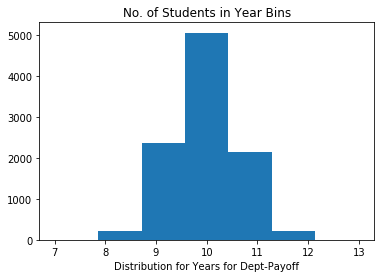

In [37]:
#Calculating income and debt payment matrices for new parameters
p["I0"] = 90000
p["stdev"] = 0.17
income_mat = income_matrix(p)

final_debt_year = np.zeros((p["sims"], 1))
for i in range(0, p["sims"]):
    payoff_mat = np.cumsum(income_mat[i,:]) * PAYMENT_PER
    incomplete_pay = payoff_mat < DEBT
    final_debt_year[i,0] = sum(incomplete_pay) + 1

#New histogram for no. of years of payoff for 100,000 simulations
plt.hist(final_debt_year, bins = len(np.unique(final_debt_year)))
plt.xlabel("Distribution for Years for Dept-Payoff")
plt.title("No. of Students in Year Bins")

In [38]:
#New percentage of simulation where debt is paid off on or before 10 years
sum(((final_debt_year[:,0] <= MAX_PAYOFF_YEAR)* 100 ) / p["sims"])

76.48000000000222

Percentable of simulation where debt is paid off on or before 10 years ~ 76.48%.